# Exercise 2b: Arithmetic and Aggregation

## Aim: Learn to do computation with xarray

Find the teaching materials here: https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html

### Issues covered: 
- Doing arithmetic on data arrays
- Using `.mean()`, `.std()`, `.max()` and `.min()`

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [7]:
import xarray as xr
import numpy as np
ds=xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temperature= ds["temp"]

Q2. Let's compare the data between the sea surface and further down. Create two temperature datasets and extract the temperature change data the sea surface and the sea bottom

In [18]:
temperature.depth.max()

<xarray.DataArray 'depth' ()> Size: 4B
array(5192.45, dtype=float32)

In [21]:
#min (surface 0) and max (max depth) and the find the difference
#difference temp at max depth minus temp at min depth
temp_surface=temperature.sel(depth=0, method="nearest")
temp_bottom=temperature.sel(depth=temperature.depth.max())

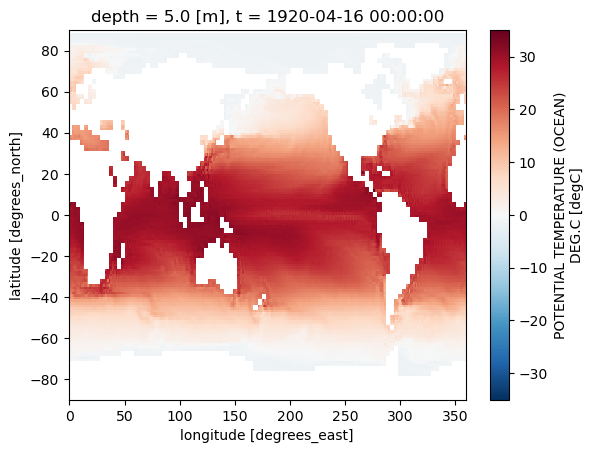

In [22]:
temp_surface.plot()

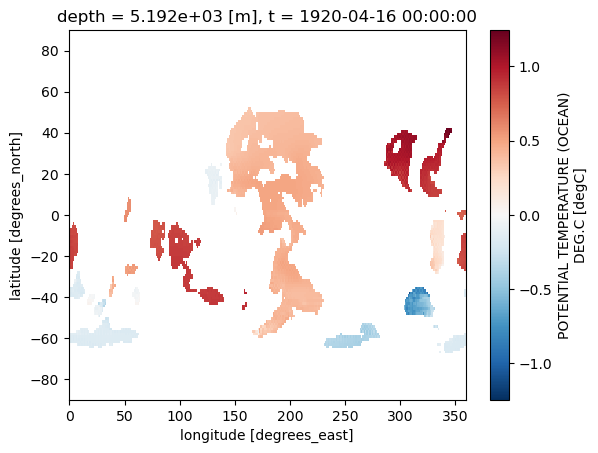

In [23]:
temp_bottom.plot()

Q3. Calculate the difference in temperature the bottom of the ocean and the surface.

In [24]:
temp_difference=temp_bottom-temp_surface

Q4. Plot the difference in these temperatures using xarrays built-in features.

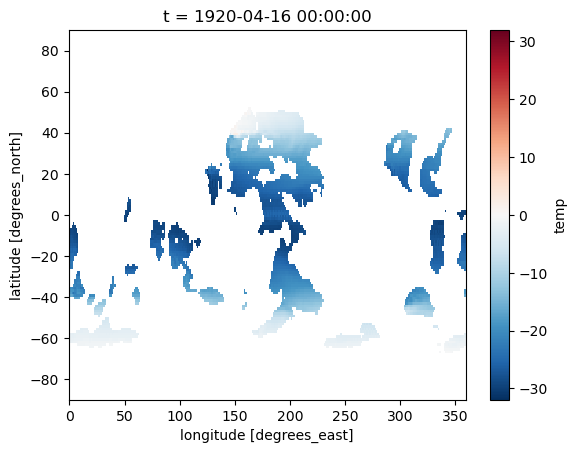

In [25]:
temp_difference.plot()

Q5. Calculate the **minimum** temperature across the water depth in all locations.

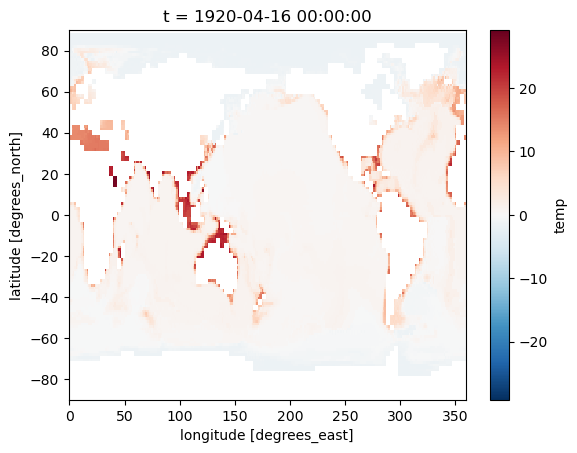

In [28]:
temperature.min(dim="depth").plot()

Q6. Compute the global average ocean temperature change for the entire time period (only one time point) in the dataset. Then display the result as a 2D depth profile.

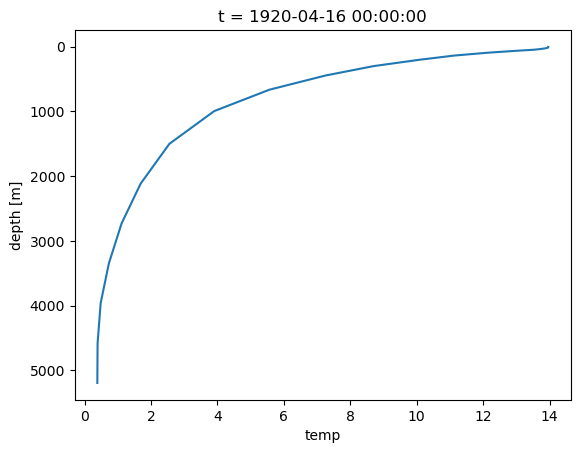

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ave_temp=temperature.mean(dim=["latitude", "longitude"]).plot(y="depth", ax=ax)
ax.invert_yaxis()

Q7. Calculate the zonal average temperature change for each latitude. Plot the result as a 2d contour with depth on the y axis and latitude on x.

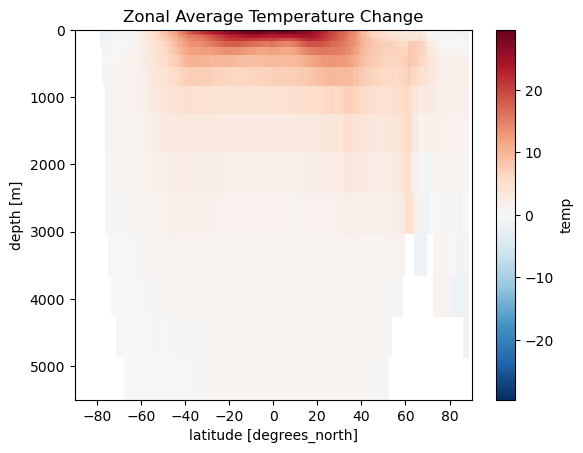

In [37]:
fig, ax = plt.subplots()
temperature.mean(dim="longitude").plot(ax=ax)
plt.title('Zonal Average Temperature Change')
ax.invert_yaxis()